# **Project Name**    - 🚕 Uber Supply-Demand Gap Analysis


##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name -** Abhay Pratap Singh

# **Project Summary -**

<!-- Write the summary here within 500-600 words. -->
In a dynamic urban mobility environment, Uber’s ability to meet real-time customer demand is critical to its success. This project focuses on analyzing Uber ride request data to uncover when and where supply-demand mismatches occur, and to recommend data-driven solutions to bridge this gap. Using a combination of Excel, SQL, and Python (Pandas, Seaborn), this exploratory data analysis (EDA) project aims to provide actionable insights that support operational improvements and business growth.

The dataset provided includes details of Uber ride requests made in July 2016. Each record captures the request ID, pickup point (either "City" or "Airport"), driver ID (if assigned), request and drop timestamps, and the final status of the ride (Trip Completed, Cancelled, or No Cars Available). The primary challenge lies in understanding the patterns behind failed requests (cancelled or unfulfilled) and identifying the time slots and locations most affected.

The first step involved cleaning the dataset using Microsoft Excel. This included formatting inconsistent date and time entries, removing corrupted rows, and separating date/time columns to make them easier to analyze later. The cleaned dataset was then used for SQL-based queries to extract statistical insights, and for Python-based feature engineering and visual exploration.

In the Python notebook, additional columns were created by combining and parsing the Request date and Request time into a single Request_datetime column. From this, new features like request_hour, time_slot, request_weekday, and a boolean flag is_failed_request were generated to facilitate deep dive visual analysis.

The visual EDA revealed some powerful insights:

Peak request hours were observed between 5 AM–10 AM and 5 PM–9 PM, corresponding to typical commute hours.

The early morning slot (5 AM–9 AM) had the highest failure rates due to No Cars Available, especially for Airport pickups.

The City pickup point had more Cancelled rides, particularly in the evening.

The Airport location consistently showed low driver availability, indicating a structural supply issue.

These findings suggest a clear mismatch between rider demand and driver supply at certain hours and locations. To address this, we propose the following solutions:

Driver Incentive Programs during early mornings and evenings to boost availability.

Dynamic Driver Routing and real-time repositioning using historical demand data.

Dedicated Airport Fleet Coverage to reduce unfulfilled requests at the airport.

Cancellation Analysis to understand and mitigate reasons behind city-based cancellations.

In conclusion, this project not only identifies the key problem areas in Uber's ride fulfillment system but also offers targeted business strategies to improve operational efficiency. By reducing the number of unfulfilled requests and cancellations, Uber can significantly improve customer satisfaction and increase revenue during peak demand periods.

This project is an excellent example of how EDA can directly inform business strategy, improve customer experience, and provide competitive advantage. The methods used — Excel dashboards, SQL queries, and Python visualizations — demonstrate the power of multi-tool analysis for real-world business problems.

# **GitHub Link -**

https://github.com/Abhaysingh77/uber-supply-demand-gap-analysis

# **Problem Statement**


Uber is facing a **supply-demand imbalance**, especially during peak hours in specific locations like **Airport** and **City**. Many ride requests are being **cancelled** or marked as **No Cars Available**, resulting in **lost revenue** and **poor customer experience**.

The goal of this project is to analyze Uber ride request data, identify where and when the supply-demand gap occurs, and generate **actionable business insights** to fix it.

#### **Define Your Business Objective?**

The main business objectives are:

- **Analyze hourly trends** to understand when most requests are placed and when most failures happen
- **Identify locations (City/Airport)** with poor supply or high cancellations
- **Measure failure rates** across time slots and pickup points
- **Recommend actions** that Uber can take to **minimize lost rides**, **optimize driver allocation**, and **improve fulfillment rates**

This will help Uber **maximize ride completions**, **retain users**, and **improve profitability** during high-demand periods.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [25]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


### Dataset Loading

In [26]:
# Load Dataset
df = pd.read_csv("./Uber Request Data.csv")

### Dataset First View

In [27]:
# Dataset First Look
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_date,Request_time,Drop_date,Drop_time
0,1,Airport,285.0,Trip Completed,11/7/2016,12:20:00 AM,11/7/2016,12:51:00 AM
1,2,Airport,NaN,No Cars Available,11/7/2016,12:23:00 AM,NaN,NaN
2,3,Airport,80.0,Trip Completed,11/7/2016,12:24:00 AM,11/7/2016,1:31:00 AM
3,4,City,NaN,No Cars Available,11/7/2016,12:37:00 AM,NaN,NaN
4,5,Airport,264.0,Trip Completed,11/7/2016,12:36:00 AM,11/7/2016,1:35:00 AM


### Dataset Rows & Columns count

In [28]:
# Dataset Rows & Columns count
rows, cols = df.shape
print("rows count:",rows)
print("columns count:",cols)

rows count: 6745
columns count: 8


### Dataset Information

In [29]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Request_id    6745 non-null   int64  
 1   Pickup_point  6745 non-null   object 
 2   Driver_id     4095 non-null   float64
 3   Status        6745 non-null   object 
 4   Request_date  6745 non-null   object 
 5   Request_time  6745 non-null   object 
 6   Drop_date     2831 non-null   object 
 7   Drop_time     2831 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 421.7+ KB


#### Duplicate Values

In [30]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum();
print(f"Duplicate rows in dataset: {duplicate_count}")

Duplicate rows in dataset: 0


#### Missing Values/Null Values

In [31]:
# Missing Values/Null Values Count
null_values_count = df.isnull().sum();
print(null_values_count)

Request_id         0
Pickup_point       0
Driver_id       2650
Status             0
Request_date       0
Request_time       0
Drop_date       3914
Drop_time       3914
dtype: int64


<Axes: >

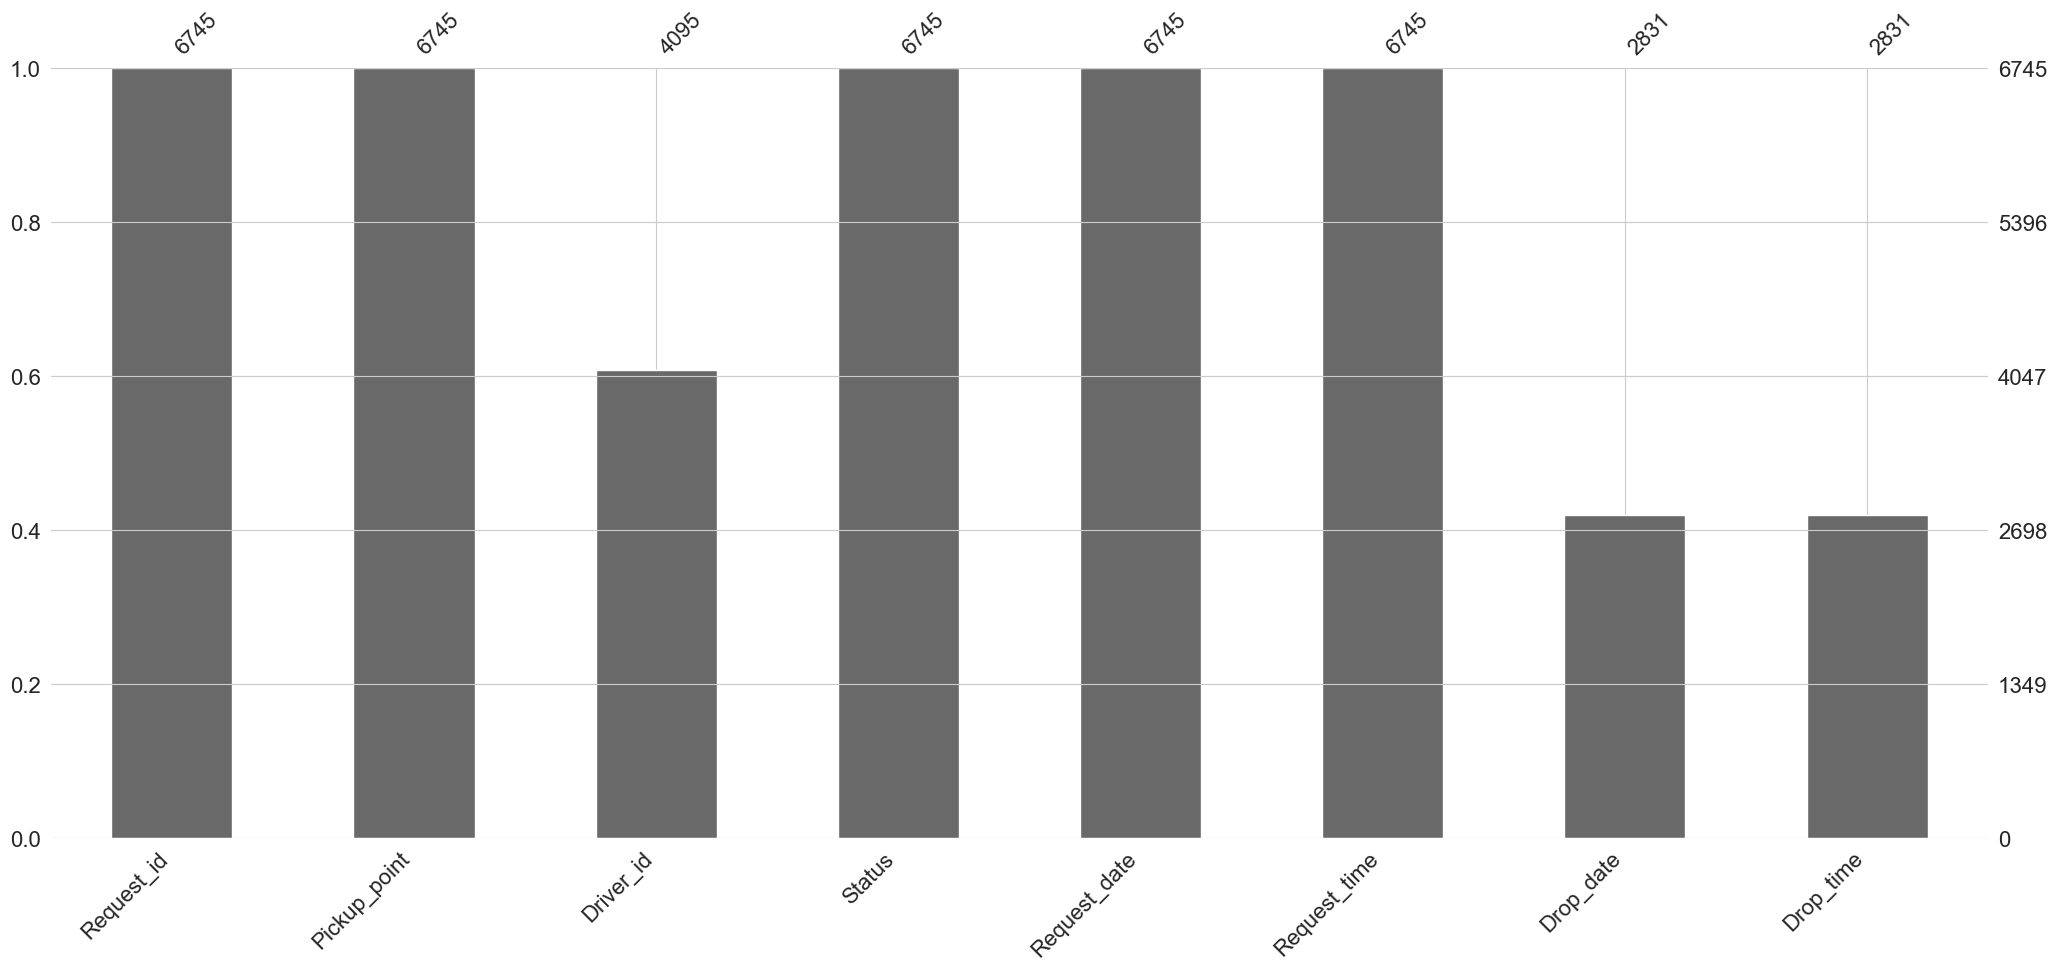

In [32]:
# Visualizing the missing values
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# plt.title("Missing Values Heatmap")
# plt.show()

# using missingno lib
msno.bar(df)

In [33]:
### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [34]:
# Dataset Columns
df.dtypes

Request_id        int64
Pickup_point     object
Driver_id       float64
Status           object
Request_date     object
Request_time     object
Drop_date        object
Drop_time        object
dtype: object

In [35]:
# Dataset Describe
df.describe(include="all")

,Request_id,Pickup_point,Driver_id,Status,Request_date,Request_time,Drop_date,Drop_time
count,6745.000000,6745,4095.000000,6745,6745,6745,2831,2831
unique,NaN,2,NaN,3,5,4955,6,2393
top,NaN,City,NaN,Trip Completed,15-07-2016,7:02:00 PM,11/7/2016,9:53:00 PM
freq,NaN,3507,NaN,2831,1381,9,582,6
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN,NaN,NaN


### Variables Description

 Column Name         | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| **Request id**      | Unique identifier for each ride request.                                    |
| **Pickup point**    | Location where the customer requested pickup — either **Airport** or **City**. |
| **Driver id**       | Unique identifier for the driver assigned to the request (may be missing if no driver was assigned). |
| **Status**          | Outcome of the request: `Trip Completed`, `Cancelled`, or `No Cars Available`. |
| **Request date**    | Date on which the customer placed the request (`dd/mm/yyyy` format).        |
| **Request time**    | Time of the request in 12-hour format with AM/PM.                            |
| **Drop time**       | Time when the trip ended (may be missing for failed requests).              |

### ℹ️ Notes:
- Missing values in `Drop time` and `Driver id` are expected for failed ride requests.
- Time-derived columns help visualize the **supply-demand gap over time**.

### Check Unique Values for each variable.

In [36]:
# Check Unique Values for each variable.
# Show number of unique values in each column
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")


Request_id: 6745 unique values
Pickup_point: 2 unique values
Driver_id: 300 unique values
Status: 3 unique values
Request_date: 5 unique values
Request_time: 4955 unique values
Drop_date: 6 unique values
Drop_time: 2393 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [37]:
# Write your code to make your dataset analysis ready.

# Check and remove duplicates
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# View missing values
df.isnull().sum()

# Convert to full datetime
df['Request_datetime'] = pd.to_datetime(
    df['Request_date'] + ' ' + df['Request_time'],
    dayfirst=True,           # dd/mm/yyyy
    errors='coerce'          # if any date is corrupt, it won't crash — it'll just show as NaT
)



df['request_hour'] = df['Request_datetime'].dt.hour
df['request_day'] = df['Request_datetime'].dt.day
df['request_weekday'] = df['Request_datetime'].dt.day_name()


def get_time_slot(hour):
    if 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'
    else:
        return 'Late Night'

# Create time_slot Buckets (Categorical)
df['time_slot'] = df['request_hour'].apply(get_time_slot)

#  Create is_failed_request Column (True/False)
df['is_failed_request'] = df['Status'].isin(['Cancelled', 'No Cars Available'])


df[['Request_datetime', 'request_hour', 'time_slot', 'Status', 'is_failed_request']].head()



Duplicate rows: 0


C:\Users\Gayatri\AppData\Local\Temp\ipykernel_26380\1128587383.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Request_datetime'] = pd.to_datetime(


,Request_datetime,request_hour,time_slot,Status,is_failed_request
0,2016-07-11 00:20:00,0,Late Night,Trip Completed,False
1,2016-07-11 00:23:00,0,Late Night,No Cars Available,True
2,2016-07-11 00:24:00,0,Late Night,Trip Completed,False
3,2016-07-11 00:37:00,0,Late Night,No Cars Available,True
4,2016-07-11 00:36:00,0,Late Night,Trip Completed,False


### What all manipulations have you done and insights you found?

### 🧹 Data Wrangling Summary

- ✅ **Duplicate rows** were checked and removed (if any).
- ✅ **Missing values** were identified in `Drop time` and `Driver id`, which are expected for failed or unfulfilled ride requests. These rows are retained for meaningful supply-demand gap analysis.
- ✅ **Datetime parsing**: Combined `Request date` and `Request time` into a single column `Request_datetime` using `pd.to_datetime()` for accurate time-based analysis.
- ✅ **Feature engineering**:
    - Extracted `request_hour`, `request_day`, and `request_weekday` from the parsed datetime.
    - Created a new categorical column `time_slot` to categorize requests into parts of the day like Morning, Evening, etc.
    - Added a boolean column `is_failed_request` which is `True` for requests with status `Cancelled` or `No Cars Available`.

These transformations prepare the dataset for meaningful exploratory data analysis in the next section.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\Gayatri\AppData\Local\Temp\ipykernel_26380\1374763306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='request_hour', data=df, palette='Set2')


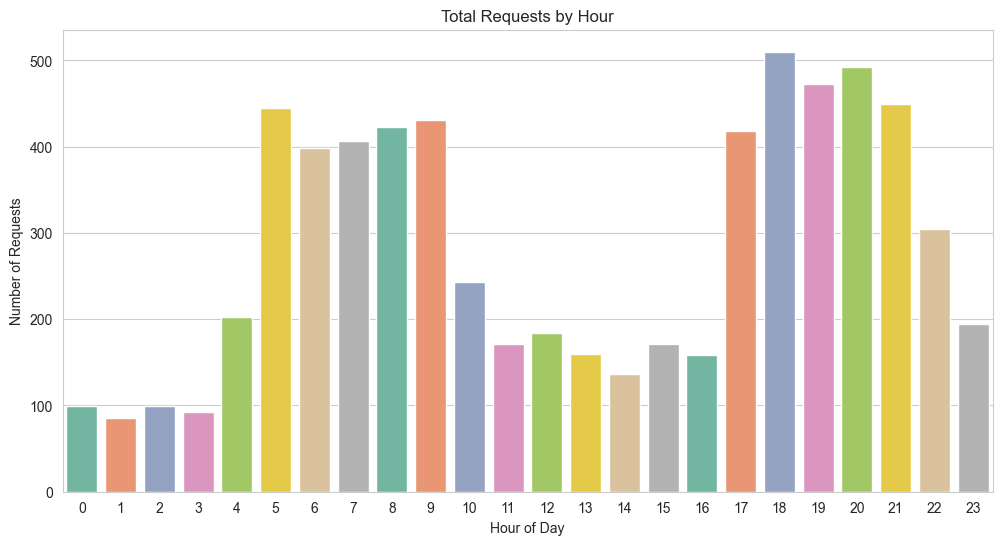

In [38]:
# Chart - 1 visualization code
sns.countplot(x='request_hour', data=df, palette='Set2')
plt.title("Total Requests by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot effectively shows the total number of requests received during each hour of the day, making it easy to identify peak demand periods.

##### 2. What is/are the insight(s) found from the chart?

Highest number of ride requests occur between 5 AM to 10 AM and again between 5 PM to 9 PM.

These times align with typical office commute hours, indicating high demand during peak traffic periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. By identifying peak hours, Uber can optimize driver allocation, offer incentives during high-demand periods, and improve wait times.

Not addressing these peaks may lead to rider dissatisfaction and missed revenue opportunities.

#### Chart - 2

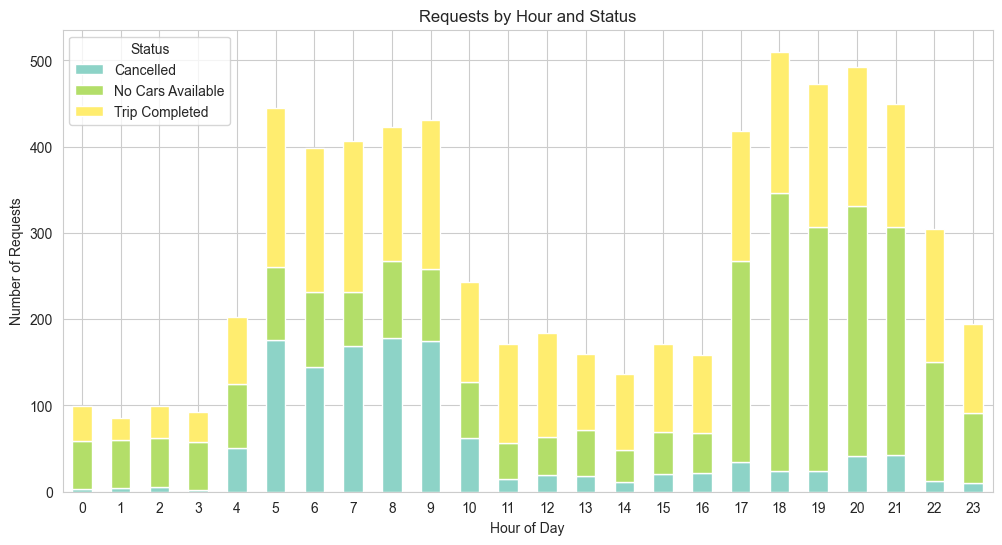

In [39]:
# Chart - 2 visualization code
# Group by hour and status
hourly_status = df.groupby(['request_hour', 'Status']).size().unstack()

# Plot
hourly_status.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Requests by Hour and Status")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.show()


##### 1. Why did you pick the specific chart?

A stacked bar chart allows clear comparison of different request outcomes (Trip Completed, Cancelled, No Cars Available) across each hour of the day.

##### 2. What is/are the insight(s) found from the chart?

Early morning hours (5 AM – 9 AM) have a high volume of unfulfilled requests, especially No Cars Available.

Evening hours (5 PM – 9 PM) show high cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Uber can increase driver incentives or run surge pricing to improve supply in hours with poor fulfillment rates.

❌ If ignored, these gaps could lead to customer churn and a negative brand image.

#### Chart - 3

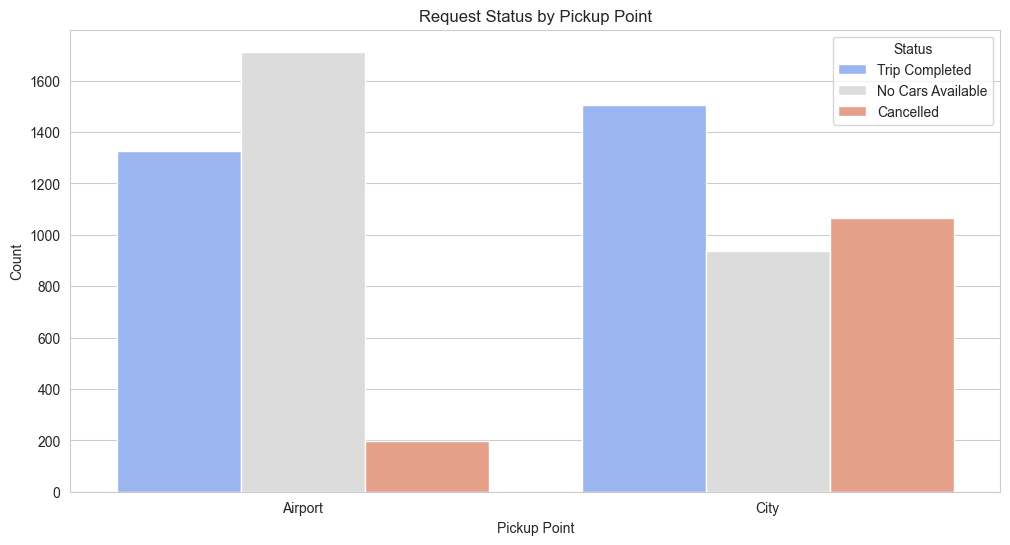

In [40]:
# Chart - 3 visualization code

sns.countplot(x='Pickup_point', hue='Status', data=df, palette='coolwarm')
plt.title("Request Status by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart makes it easy to compare trip status outcomes across the two pickup locations: City and Airport.

##### 2. What is/are the insight(s) found from the chart?

The Airport suffers from more No Cars Available issues.

The City sees more Cancelled rides.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Uber can assign dedicated airport fleet coverage or dynamic driver routing.

❌ If not addressed, this may lead to lower reliability at airports, affecting both travelers and airport partnerships.

#### Chart - 4

C:\Users\Gayatri\AppData\Local\Temp\ipykernel_26380\184270508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='time_slot', data=failed, order=[


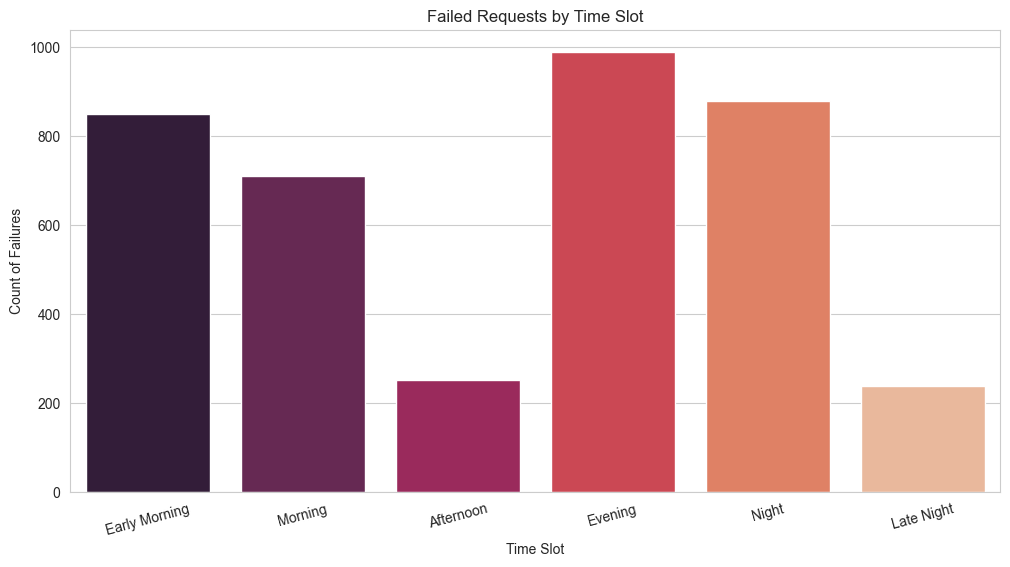

In [41]:
# Chart - 4 visualization code
failed = df[df['is_failed_request'] == True]

sns.countplot(x='time_slot', data=failed, order=[
    'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'
], palette='rocket')
plt.title("Failed Requests by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Count of Failures")
plt.xticks(rotation=15)
plt.show()


##### 1. Why did you pick the specific chart?

A time-slot grouped countplot highlights when in the day most failed requests occur, making supply-demand gaps more readable.

##### 2. What is/are the insight(s) found from the chart?

Early Morning and Night slots have the highest number of failures.

Suggests a supply gap due to fewer active drivers in these time slots.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Uber can offer higher payouts to encourage late-night/early drivers.

❌ If left unaddressed, users may switch to other services for critical early/late travel needs (like airport drops).

#### Chart - 5

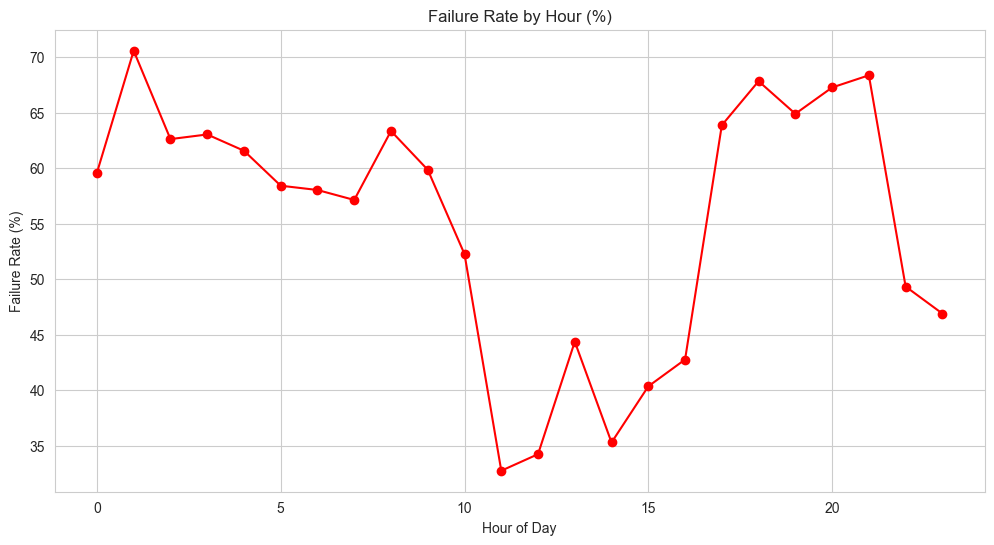

In [42]:
# Chart - 5 visualization code
# Group and calculate % of failed requests per hour
failure_rate = df.groupby('request_hour')['is_failed_request'].mean() * 100

failure_rate.plot(kind='line', marker='o', color='red')
plt.title("Failure Rate by Hour (%)")
plt.xlabel("Hour of Day")
plt.ylabel("Failure Rate (%)")
plt.grid(True)
plt.show()


#### 1. Why did you pick the specific chart?

A line plot clearly shows failure trends over time, with a percentage focus instead of just volume — revealing relative performance per hour.

##### 2. What is/are the insight(s) found from the chart?

Highest failure rates occur between 5 AM–9 AM and again after 8 PM.

Despite high demand, fulfillment is poor — strong indicator of supply-demand mismatch.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Uber can use this insight to balance supply, improve app wait time, and maximize revenue.

❌ Failure to meet demand in high-need hours leads to wasted opportunity and user drop-off.

#### Chart - 6

In [43]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [44]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [45]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [46]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [47]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [48]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [49]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [50]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [51]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [52]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To address the **supply-demand gap in Uber services**, especially during peak hours and critical time slots, we suggest the following:

1. **Dynamic Driver Incentives**  
   - Offer higher payouts or bonuses during early morning (5–9 AM) and evening (5–9 PM) slots.
   - This will motivate more drivers to be active during high-demand hours.

2. **Demand Forecasting & Driver Allocation**  
   - Use historical data to predict peak load times and proactively position drivers near **airports** and **city hotspots**.

3. **Dedicated Airport Supply Pool**  
   - Deploy a fixed number of drivers to serve airport requests, where "No Cars Available" was significantly high.

4. **Cancellation Reduction Campaign**  
   - Investigate causes of ride cancellations from drivers, especially for city pickups.
   - Introduce penalties for frequent cancellations or incentives for consistent fulfillment.

5. **Improve App Messaging**  
   - During failure-prone hours, inform users about expected delays or availability issues — improving user trust.

These strategies directly align with Uber’s goal of **reducing missed opportunities**, **improving customer satisfaction**, and **increasing revenue**.


# **Conclusion**

This Exploratory Data Analysis (EDA) on Uber ride requests revealed a clear **mismatch between demand and supply**, especially during peak hours like early mornings and evenings.

Key observations include:
- **High failure rates** due to `No Cars Available` at the **Airport**
- **High cancellation rates** from **City** pickups
- Peak ride requests align with **commute hours**, but supply often fails to meet demand

By using targeted driver incentives, smart allocation, and proactive communication, Uber can minimize the supply-demand gap and significantly improve user experience.

Overall, this data-driven approach provides valuable insights that can help Uber make **strategic operational improvements**.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***